# Food classification

in this file we will train a model that classifies food images between sushi and fish&chips

In [7]:
# Convolutional Neural Network

# Installing Keras, TensorFlow and other packages  

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense



import os
from os import listdir
from os.path import isfile, join
import shutil
import stat
import collections
from collections import defaultdict


# Part 1 - Building the CNN
# split data


if not os.path.isdir('./dataset/food-101/test_set') and not os.path.isdir('./dataset/food-101/training_set'):

    def copytree(src, dst, symlinks = False, ignore = None):
        if not os.path.exists(dst):
            os.makedirs(dst)
            shutil.copystat(src, dst)
        lst = os.listdir(src)
        if ignore:
            excl = ignore(src, lst)
            lst = [x for x in lst if x not in excl]
        for item in lst:
            s = os.path.join(src, item)
            d = os.path.join(dst, item)
            if symlinks and os.path.islink(s):
                if os.path.lexists(d):
                    os.remove(d)
                os.symlink(os.readlink(s), d)
                try:
                    st = os.lstat(s)
                    mode = stat.S_IMODE(st.st_mode)
                    os.lchmod(d, mode)
                except:
                    pass 
            elif os.path.isdir(s):
                copytree(s, d, symlinks, ignore)
            else:
                shutil.copy2(s, d)

    def generate_dir_file_map(path):
        dir_files = defaultdict(list)
        with open(path, 'r') as txt:
            files = [l.strip() for l in txt.readlines()]
            for f in files:
                dir_name, id = f.split('/')
                dir_files[dir_name].append(id + '.jpg')
        return dir_files

    train_dir_files = generate_dir_file_map('dataset/food-101/meta/train.txt')
    test_dir_files = generate_dir_file_map('dataset/food-101/meta/test.txt')


    def ignore_train(d, filenames):
        print(d)
        subdir = d.split('/')[-1]
        to_ignore = train_dir_files[subdir]
        return to_ignore

    def ignore_test(d, filenames):
        print(d)
        subdir = d.split('/')[-1]
        to_ignore = test_dir_files[subdir]
        return to_ignore

    copytree('dataset/food-101/images', 'dataset/food-101/test_set', ignore=ignore_train)
    copytree('dataset/food-101/images', 'dataset/food-101/training_set', ignore=ignore_test)
    
else:
    print('Train/Test files already copied into separate folders.')

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])




# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/food-101/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/food-101/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 10,
                         validation_data = test_set,
                         nb_val_samples = 2000)




Train/Test files already copied into separate folders.
Found 1500 images belonging to 2 classes.


/Users/bouzianemeed/Desktop/project/env/lib/python3.7/site-packages/ipykernel_launcher.py:89: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
/Users/bouzianemeed/Desktop/project/env/lib/python3.7/site-packages/ipykernel_launcher.py:95: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/Users/bouzianemeed/Desktop/project/env/lib/python3.7/site-packages/ipykernel_launcher.py:102: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/Users/bouzianemeed/Desktop/project/env/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


Found 500 images belonging to 2 classes.


/Users/bouzianemeed/Desktop/project/env/lib/python3.7/site-packages/ipykernel_launcher.py:136: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/Users/bouzianemeed/Desktop/project/env/lib/python3.7/site-packages/ipykernel_launcher.py:136: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=250, epochs=10, validation_steps=2000)`


Epoch 1/10
250/250 [==============================] - 262s 1s/step - loss: 0.5047 - accuracy: 0.7479 - val_loss: 0.5597 - val_accuracy: 0.8020
Epoch 2/10
250/250 [==============================] - 258s 1s/step - loss: 0.3745 - accuracy: 0.8404 - val_loss: 0.2543 - val_accuracy: 0.8540
Epoch 3/10
250/250 [==============================] - 255s 1s/step - loss: 0.2850 - accuracy: 0.8813 - val_loss: 0.1141 - val_accuracy: 0.8560
Epoch 4/10
250/250 [==============================] - 267s 1s/step - loss: 0.2195 - accuracy: 0.9130 - val_loss: 0.4640 - val_accuracy: 0.8440
Epoch 5/10
250/250 [==============================] - 255s 1s/step - loss: 0.1638 - accuracy: 0.9369 - val_loss: 0.0203 - val_accuracy: 0.8900
Epoch 6/10
250/250 [==============================] - 236s 945ms/step - loss: 0.1398 - accuracy: 0.9470 - val_loss: 0.2412 - val_accuracy: 0.8960
Epoch 7/10
250/250 [==============================] - 242s 969ms/step - loss: 0.1030 - accuracy: 0.9627 - val_loss: 0.2116 - val_accuracy: 

sushi


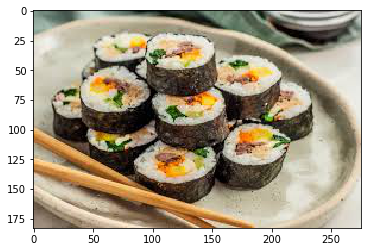

In [18]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from IPython.display import Image
image_up = 'im.png'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# setting the image
test_image = load_img(image_up, target_size = (64,64))


test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

# predict the name of the food in the image
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0]>=0.5 :
    prediction ='sushi'
else :
    prediction = 'fish and chips'
print(prediction)


# show the image
img=mpimg.imread(image_up, 0)
imgplot = plt.imshow(img)
plt.show()


